In [1]:
# Install the KAN library if you haven't already:
# !pip install git+https://github.com/KindXiaoming/pykan.git

from kan import KAN 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

import kan
from kan.utils import create_dataset , create_dataset_from_data



# 2

## for constant u and a

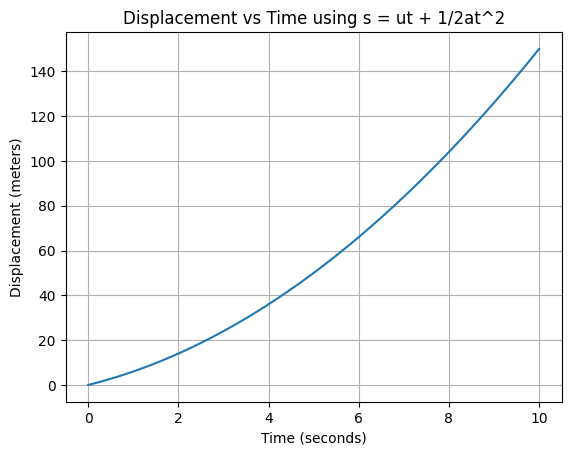

Time: 0.0 sec, Displacement: 0.00 m
Time: 0.1 sec, Displacement: 0.52 m
Time: 0.2 sec, Displacement: 1.05 m
Time: 0.3 sec, Displacement: 1.61 m
Time: 0.4 sec, Displacement: 2.18 m
Time: 0.5 sec, Displacement: 2.78 m
Time: 0.6 sec, Displacement: 3.40 m
Time: 0.7 sec, Displacement: 4.04 m
Time: 0.8 sec, Displacement: 4.69 m
Time: 0.9 sec, Displacement: 5.37 m
Time: 1.0 sec, Displacement: 6.07 m
Time: 1.1 sec, Displacement: 6.79 m
Time: 1.2 sec, Displacement: 7.53 m
Time: 1.3 sec, Displacement: 8.29 m
Time: 1.4 sec, Displacement: 9.07 m
Time: 1.5 sec, Displacement: 9.87 m
Time: 1.6 sec, Displacement: 10.69 m
Time: 1.7 sec, Displacement: 11.53 m
Time: 1.8 sec, Displacement: 12.40 m
Time: 1.9 sec, Displacement: 13.28 m
Time: 2.0 sec, Displacement: 14.18 m
Time: 2.1 sec, Displacement: 15.11 m
Time: 2.2 sec, Displacement: 16.05 m
Time: 2.3 sec, Displacement: 17.01 m
Time: 2.4 sec, Displacement: 18.00 m
Time: 2.5 sec, Displacement: 19.00 m
Time: 2.6 sec, Displacement: 20.03 m
Time: 2.7 sec, Di

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
u = 5  # Initial velocity (m/s)
a = 2  # Acceleration (m/s^2)

# Generate time values from 0 to 10 seconds with 0.1 second intervals
t = np.linspace(0, 10, 100)

# Calculate displacement using the equation s = ut + 1/2 at^2
s = u * t + 0.5 * a * t**2

# Plotting the data
plt.plot(t, s)
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.title("Displacement vs Time using s = ut + 1/2at^2")
plt.grid(True)
plt.show()

# Displaying the generated data
for time, displacement in zip(t, s):
    print(f"Time: {time:.1f} sec, Displacement: {displacement:.2f} m")


In [3]:
# Create a DataFrame with the variables
df = pd.DataFrame({
    't': t,
    'u': u,
    'a': a,
    's': s
})

# Save the DataFrame to a CSV file
df.to_csv('../data/phy_data_1.csv', index=False)

## for variable u and a

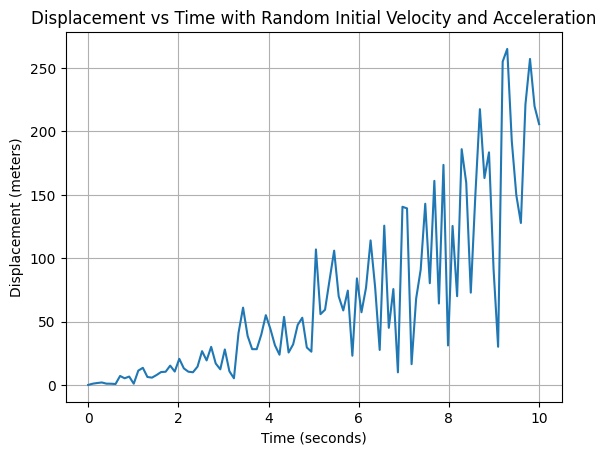

Time: 0.0 sec, u: 3.75 m/s, a: 0.16 m/s^2, Displacement: 0.00 m
Time: 0.1 sec, u: 9.51 m/s, a: 3.18 m/s^2, Displacement: 0.98 m
Time: 0.2 sec, u: 7.32 m/s, a: 1.57 m/s^2, Displacement: 1.51 m
Time: 0.3 sec, u: 5.99 m/s, a: 2.54 m/s^2, Displacement: 1.93 m
Time: 0.4 sec, u: 1.56 m/s, a: 4.54 m/s^2, Displacement: 1.00 m
Time: 0.5 sec, u: 1.56 m/s, a: 1.25 m/s^2, Displacement: 0.95 m
Time: 0.6 sec, u: 0.58 m/s, a: 2.05 m/s^2, Displacement: 0.73 m
Time: 0.7 sec, u: 8.66 m/s, a: 3.78 m/s^2, Displacement: 7.07 m
Time: 0.8 sec, u: 6.01 m/s, a: 1.14 m/s^2, Displacement: 5.23 m
Time: 0.9 sec, u: 7.08 m/s, a: 0.38 m/s^2, Displacement: 6.60 m


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random values for initial velocity (u) and acceleration (a) for each time step
np.random.seed(42)  # For reproducibility
u = np.random.uniform(0, 10, 100)  # Random initial velocities between 0 and 10 m/s
a = np.random.uniform(0, 5, 100)   # Random accelerations between 0 and 5 m/s^2

# Generate time values from 0 to 10 seconds with 0.1 second intervals
t = np.linspace(0, 10, 100)

# Calculate displacement using the equation s = ut + 1/2 at^2
s = u * t + 0.5 * a * t**2

# Plotting the data
plt.plot(t, s)
plt.xlabel("Time (seconds)")
plt.ylabel("Displacement (meters)")
plt.title("Displacement vs Time with Random Initial Velocity and Acceleration")
plt.grid(True)
plt.show()

# Displaying the generated data for the first 10 points
for i in range(10):
    print(f"Time: {t[i]:.1f} sec, u: {u[i]:.2f} m/s, a: {a[i]:.2f} m/s^2, Displacement: {s[i]:.2f} m")


In [5]:
# Create a DataFrame with the variables
df = pd.DataFrame({
    't': t,
    'u': u,
    'a': a,
    's': s
})

# Save the DataFrame to a CSV file
df.to_csv('../data/phy_data_2.csv', index=False)

In [6]:
df

,t,u,a,s
0,0.00000,3.745401,0.157146,0.000000
1,0.10101,9.507143,3.182052,0.976551
2,0.20202,7.319939,1.571780,1.510850
3,0.30303,5.986585,2.542853,1.930868
4,0.40404,1.560186,4.537832,1.000776
...,...,...,...,...
95,9.59596,4.937956,1.746048,127.774601
96,9.69697,5.227328,3.629778,221.345492
97,9.79798,4.275410,4.485551,257.197760
98,9.89899,0.254191,4.435432,219.830236


In [7]:
X = df[['t','u','a']].values
y = df['s'].values

# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert feature matrix to tensor
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Convert target to tensor and reshape


# MLP

In [8]:


# Assuming the data is already generated and loaded into X and y as tensors
# X: input tensor (features), y: output tensor (target)
# X_tensor is of shape [n_samples, 3] (u, a, t) and y_tensor is of shape [n_samples, 1] (s)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Input layer (3 input features)
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 32)
        # Output layer (1 output)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        # Forward pass through the network
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Assuming the following variables are already defined:
# X_tensor (input data of shape [n_samples, 3]), y_tensor (output data of shape [n_samples, 1])

# Initialize the model
model = MLP()

# Define the loss function (Mean Squared Error) and optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [9]:

# Training the model
epochs = 100
batch_size = 10
train_losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 9205.2930
Epoch [20/100], Loss: 9014.9883
Epoch [30/100], Loss: 8537.8076
Epoch [40/100], Loss: 7557.0024
Epoch [50/100], Loss: 5874.0176
Epoch [60/100], Loss: 3713.9534
Epoch [70/100], Loss: 2300.5684
Epoch [80/100], Loss: 2290.5300
Epoch [90/100], Loss: 2064.9773
Epoch [100/100], Loss: 1962.8417


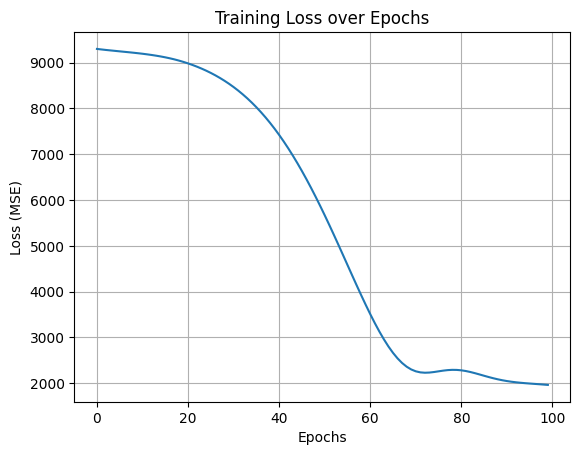

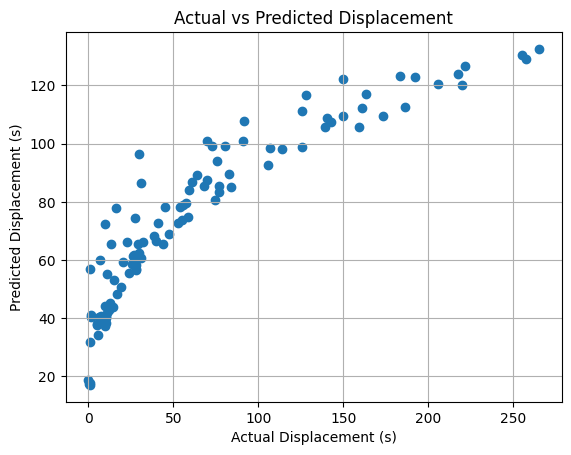

Final Loss (MSE): 1954.0347


In [10]:
# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "mlp_model.pth")

# Display the final evaluation loss
final_loss = criterion(y_pred, y_tensor)
print(f"Final Loss (MSE): {final_loss.item():.4f}")


In [11]:
import torch
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Assuming `y_tensor` (actual values) and `y_pred` (predicted values) are available
# Convert tensors to numpy arrays for easier metric calculation
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 36.5525
Mean Squared Error (MSE): 1954.0344
Root Mean Squared Error (RMSE): 44.2045
R-Squared (R²): 0.5814


# KAN

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [13]:

df = pd.read_csv("../data/phy_data_2.csv")

data = torch.tensor(df.to_numpy() , dtype=torch.float32)



x = data[:,[0,1,2]]
y = data[:,[3]]

dataset = create_dataset_from_data(x, y, device=device)


In [14]:
df

,t,u,a,s
0,0.00000,3.745401,0.157146,0.000000
1,0.10101,9.507143,3.182052,0.976551
2,0.20202,7.319939,1.571780,1.510850
3,0.30303,5.986585,2.542853,1.930868
4,0.40404,1.560186,4.537832,1.000776
...,...,...,...,...
95,9.59596,4.937956,1.746048,127.774601
96,9.69697,5.227328,3.629778,221.345492
97,9.79798,4.275410,4.485551,257.197760
98,9.89899,0.254191,4.435432,219.830236


In [15]:
dataset

{'train_input': tensor([[ 9.6970,  5.2273,  3.6298],
         [ 1.1111,  9.6991,  0.8061],
         [ 5.4545,  5.9790,  4.9283],
         [ 5.1515,  7.7513,  1.1978],
         [ 4.1414,  4.9518,  1.2589],
         [ 1.5152,  1.8340,  4.3573],
         [ 3.8384,  6.8423,  1.8181],
         [ 6.2626,  8.2874,  3.1676],
         [ 1.2121,  8.3244,  4.6485],
         [ 5.2525,  9.3950,  0.7245],
         [ 7.5758,  7.2901,  0.8718],
         [ 8.9899,  4.7221,  1.2093],
         [ 1.0101,  0.2058,  1.4488],
         [ 0.8081,  6.0111,  1.1440],
         [ 6.1616,  2.7135,  3.1615],
         [ 3.9394,  4.4015,  4.8589],
         [ 4.9495,  1.8485,  1.3932],
         [ 7.7778,  0.7404,  1.9337],
         [ 5.6566,  0.8849,  3.3607],
         [ 0.1010,  9.5071,  3.1821],
         [ 1.4141,  1.8182,  3.1670],
         [ 4.5455,  6.6252,  0.1844],
         [ 8.0808,  8.6310,  1.7053],
         [ 6.4646,  2.8093,  0.4514],
         [ 8.2828,  3.3090,  4.6235],
         [ 2.5253,  7.8518,  2.1355

In [16]:


model = KAN(width=[3,[5,5],5,1], device=device)


model.fit(dataset, steps=20, lamb=0.001);

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 3.46e-01 | test_loss: 9.87e-01 | reg: 5.16e+01 | : 100%|█| 20/20 [00:03<00:00,  5.56it

saving model version 0.1


In [17]:
# Training the model
epochs = 100
batch_size = 10
train_losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 0.2907
Epoch [20/100], Loss: 0.2907
Epoch [30/100], Loss: 0.2907
Epoch [40/100], Loss: 0.2907
Epoch [50/100], Loss: 0.2907
Epoch [60/100], Loss: 0.2907
Epoch [70/100], Loss: 0.2907
Epoch [80/100], Loss: 0.2907
Epoch [90/100], Loss: 0.2907
Epoch [100/100], Loss: 0.2907


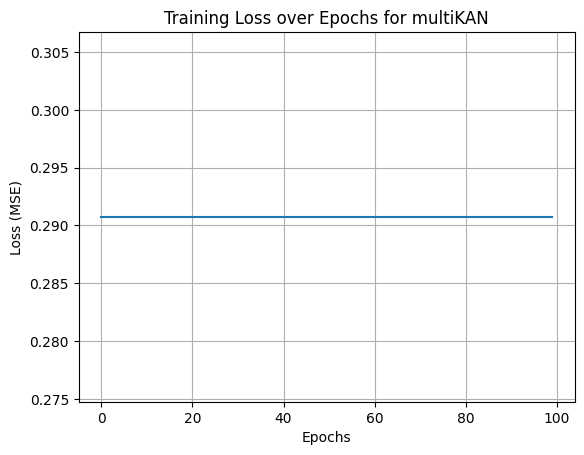

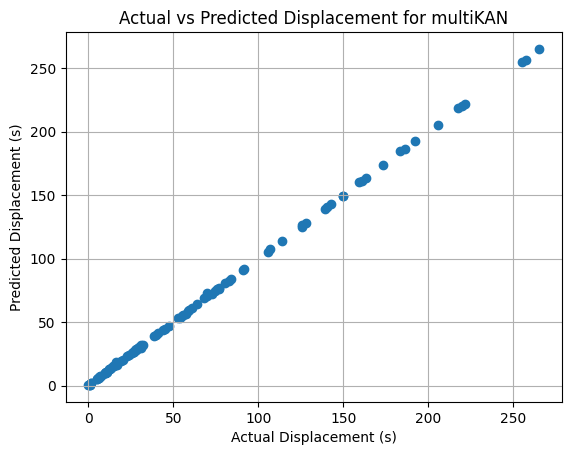

In [18]:
# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs for multiKAN")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement for multiKAN")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "multiKAN_model.pth")



In [19]:
# Calculate performance metrics
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.3424
Mean Squared Error (MSE): 0.2907
Root Mean Squared Error (RMSE): 0.5392
R-Squared (R²): 0.9999


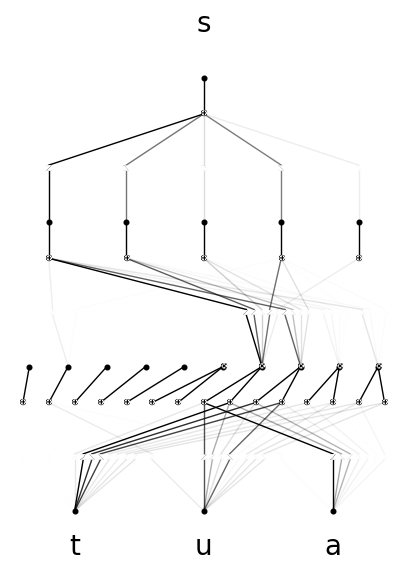

In [22]:
model.plot(in_vars=('t','u','a') , out_vars=['s'])

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.83e-01 | test_loss: 5.46e-01 | reg: 3.43e+01 | : 100%|█| 20/20 [00:02<00:00,  7.29it


saving model version 0.1
Epoch [10/20], Loss: 0.1771
Epoch [20/20], Loss: 0.1771


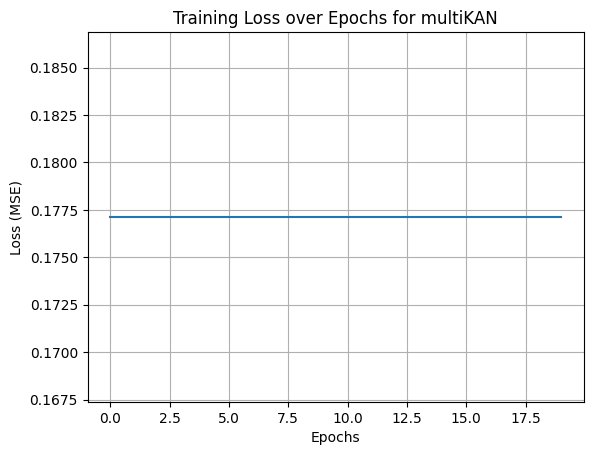

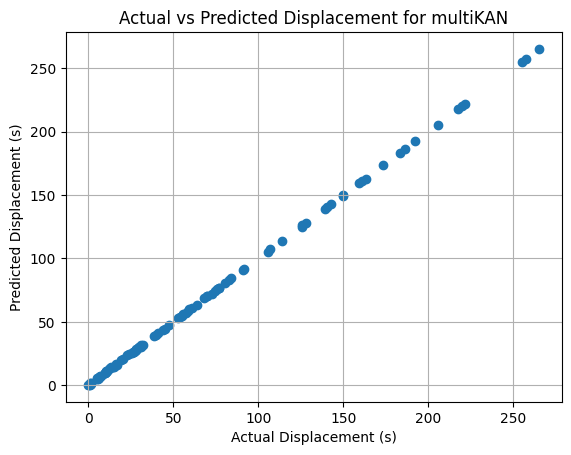

Mean Absolute Error (MAE): 0.3287
Mean Squared Error (MSE): 0.1771
Root Mean Squared Error (RMSE): 0.4209
R-Squared (R²): 1.0000


In [54]:

model = KAN(width=[3,[3,4],5,1], device=device)


model.fit(dataset, steps=20, lamb=0.001)


# Training the model
epochs = 20
batch_size = 10
train_losses = []

for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Zero the gradients
    
    # Forward pass
    y_pred = model(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backpropagation
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Store the loss for plotting
    train_losses.append(loss.item())
    
    # Print training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotting the training loss
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Epochs for multiKAN")
plt.grid(True)
plt.show()

# Evaluate the model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_tensor)

# Plot actual vs predicted values
plt.scatter(y_tensor.numpy(), y_pred.numpy())
plt.xlabel("Actual Displacement (s)")
plt.ylabel("Predicted Displacement (s)")
plt.title("Actual vs Predicted Displacement for multiKAN")
plt.grid(True)
plt.show()

# Save the model for future use
torch.save(model.state_dict(), "multiKAN_model.pth")



# Calculate performance metrics
y_true = y_tensor.numpy()
y_pred = y_pred.numpy()

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# R-Squared (R²)
r2 = r2_score(y_true, y_pred)
print(f"R-Squared (R²): {r2:.4f}")


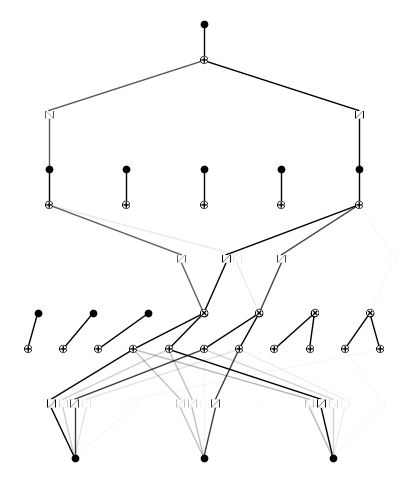

In [55]:
model.plot()

In [1]:
formula = model.symbolic_formula()[0][0]


NameError: name 'model' is not defined

In [ ]:
model.symbolic_formula()
